In [1]:
#Dependencies
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

#figure size
matplotlib.rcParams['figure.figsize'] = [11,8]

#CSV Files
mouse_drug_csv = "data/mouse_drug_data.csv"
trials_csv = "data/clinicaltrial_data.csv"

In [2]:
#create dataframes
mouse_df = pd.read_csv(mouse_drug_csv)
trials_df = pd.read_csv(trials_csv)

#combine dataframes
merged_df = pd.merge(mouse_df, trials_df, left_on='Mouse ID', right_on='Mouse ID')

## Plot average tumor volume per timepoint per drug

Text(0.5, 1.0, 'Average Tumor Volume over Time')

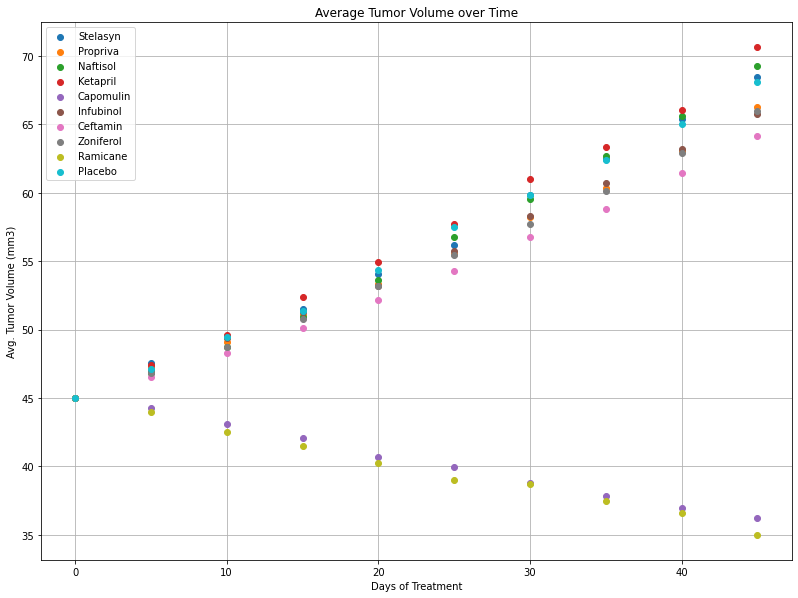

In [3]:
plot1 = merged_df.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].mean()
drugs = merged_df.Drug.unique()
[plt.scatter(y=plot1.xs(drug),x=plot1.xs(drug).index, zorder=2) for drug in drugs]
plt.legend(drugs)
plt.grid(zorder=0)
plt.tight_layout()
plt.xlabel('Days of Treatment')
plt.ylabel('Avg. Tumor Volume (mm3)')
plt.title('Average Tumor Volume over Time')

## Plot average site count

Text(0.5, 1.0, 'Average Metastatic Site count over Time')

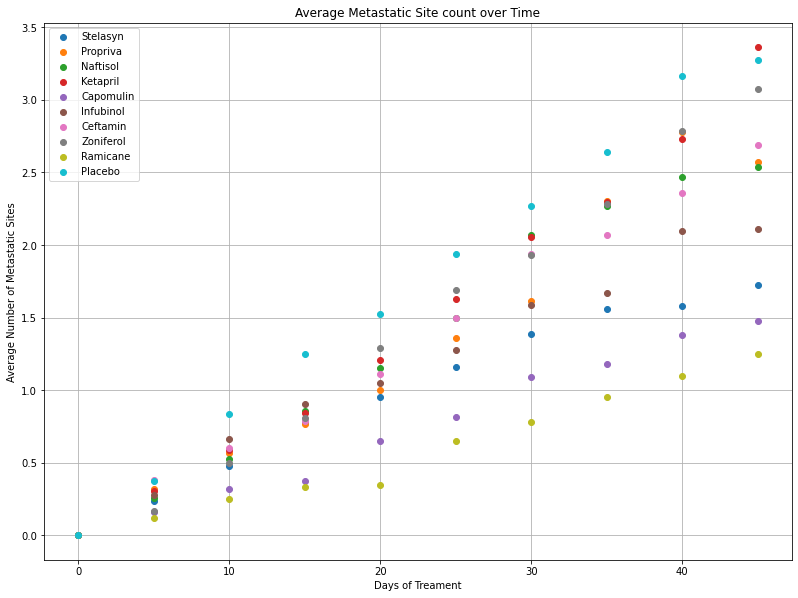

In [4]:
plot2 = merged_df.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].mean()
[plt.scatter(y=plot2.xs(drug),x=plot1.xs(drug).index, zorder=2) for drug in drugs]
plt.legend(drugs)
plt.grid(zorder=0)
plt.tight_layout()
plt.xlabel('Days of Treament')
plt.ylabel('Average Number of Metastatic Sites')
plt.title('Average Metastatic Site count over Time')

## Plot subject survival rate per drug across study

Text(0.5, 1.0, 'Survival Rate over Time')

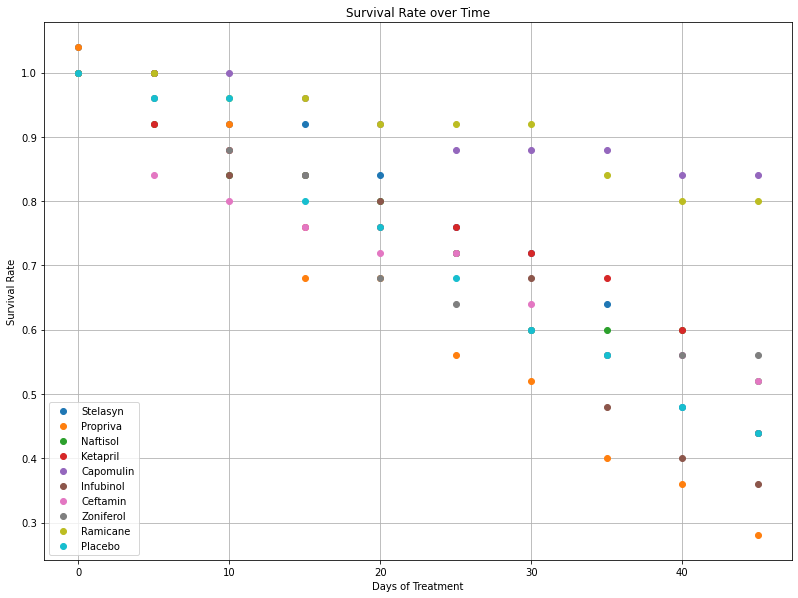

In [5]:
plot3 = merged_df.groupby(['Drug','Timepoint'])['Mouse ID'].count()
[plt.scatter(y=plot3.xs(drug)/len(mouse_df.loc[mouse_df['Drug'] == drug]), x=plot1.xs(drug).index, zorder=2) \
 for drug in drugs]
plt.legend(drugs)
plt.grid(zorder=0)
plt.tight_layout()
plt.xlabel('Days of Treatment')
plt.ylabel('Survival Rate')
plt.title('Survival Rate over Time')

## Create a bar graph comparing % change in avg tumor vol before and after the study

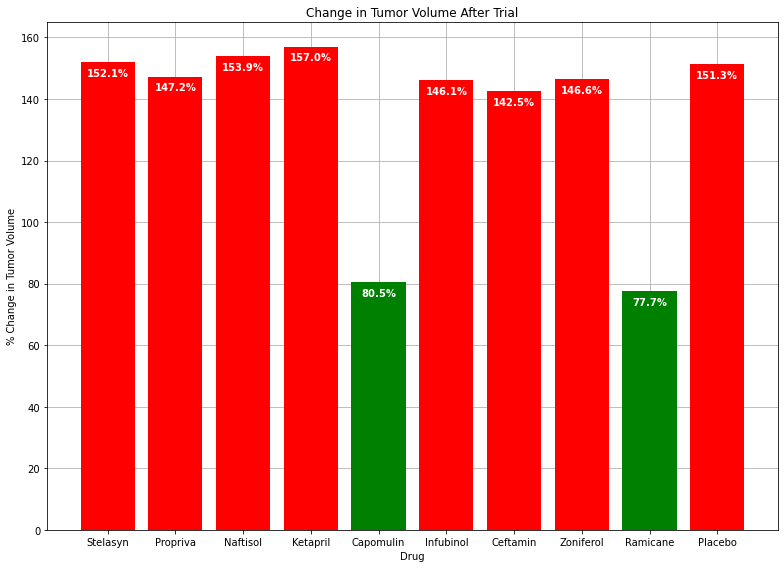

In [6]:
fig, ax = plt.subplots()
tumor_vol_changes = [plot1.xs(drug).tail(1).values[0]/plot1.xs(drug).head(1).values[0]*100 for drug in drugs]
bar_colors = ['green' if change < 100 else 'red' for change in tumor_vol_changes]
rects = ax.bar(x=drugs, height=tumor_vol_changes, color=bar_colors, zorder = 2)
ax.set_xlabel('Drug')
ax.set_ylabel('% Change in Tumor Volume')
ax.set_title('Change in Tumor Volume After Trial')
for rect in rects:
    height = rect.get_height()
    ax.annotate('{}%'.format(round(height,1)),
               xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0,-16),
                textcoords='offset points',
                ha='center', va='bottom',
                color='white', weight='bold')
ax.grid(zorder=0)
fig.tight_layout()
plt.show()

## Notes
* None of the drugs trialled were effective at reducing the count of metastatic tumor sites.
* Capomulin and Ramicane effectively reduce tumor volume in mice.
* Mice treated with Capomulin and Ramicane survived the study at the highest rate.